<a href="https://colab.research.google.com/github/Pooja1297/Project-1---Coffee-Sales/blob/main/Project_1_Coffee_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project-1 Coffee Sales
 About Dataset

 Overview

 This dataset contains detailed records of coffee sales from a vending machine.
 The vending machine is the work of a dataset author who is committed to providing an open dataset to the
 community.

 It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products.

 Data Collection Period

 The dataset spans from March 2024 to Present time, capturing daily transaction data. And new information
 continues to be added.

 Tasks

● TimeSeries Exploratory Data Analysis

 ● Nextday/week/month sales

 ● Specific customer purchases

In [ ]:
pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv('/content/index.csv')

In [ ]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [ ]:
# Check for missing values
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
# Clean and Extract hour, Day, Month from df
df['datetime'] = pd.to_datetime(df['datetime'], errors = 'coerce')
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['day_name'] = df['datetime'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=days_order, ordered=True)
df.head()


,date,datetime,cash_type,card,money,coffee_name,hour,day,month,day_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,1,3,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,1,3,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,1,3,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,1,3,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,1,3,Friday


In [ ]:
#.....Coffee sales over time with averages line charts....
# calculate total sales per day
daily_sales = df.groupby(df['datetime'].dt.date)['money'].sum()
daily_sales.index = pd.to_datetime(daily_sales.index)

# calculate average sales, daily average, weekly average and monthly average
daily_avg = daily_sales.mean()
weekly_avg = daily_sales.resample('W').sum().mean()
monthly_avg = daily_sales.resample('M').sum().mean()


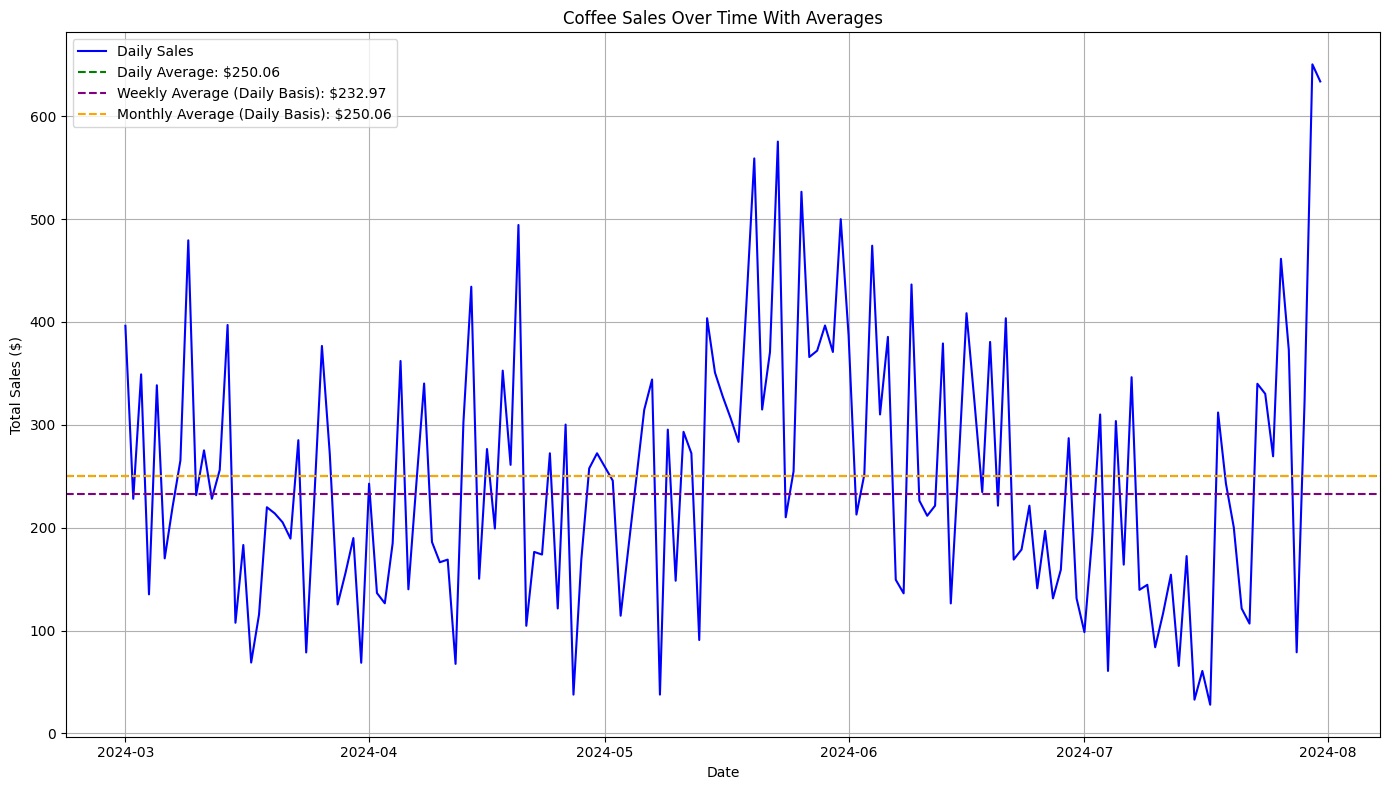

In [ ]:
# Plot the coffee sales over time with averages
plt.figure(figsize = (14,8))
plt.plot(daily_sales.index, daily_sales.values, label = 'Daily Sales', color = 'blue')

plt.axhline(daily_avg, color='green', linestyle='--', label = f'Daily Average: ${daily_avg:.2f}')
plt.axhline(weekly_avg / 7, color='purple', linestyle='--', label = f'Weekly Average (Daily Basis): ${weekly_avg / 7:.2f}')
plt.axhline(monthly_avg / 30, color='orange', linestyle='--', label = f'Monthly Average (Daily Basis): ${monthly_avg / 30:.2f}')

plt.title('Coffee Sales Over Time With Averages')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Coffee Sales Over Time with Averages**
Trend: The daily coffee sales exhibit significant variability over time, with noticeable peaks and troughs. Sales fluctuate frequently, indicating that sales are highly variable day-to-day. Averages:

The Daily Average and Monthly average lines are equal. Moreover, The Weekly Average and Monthly Average lines are relatively close, indicating consistent sales patterns over the week and month.

Pattern: The graph shows frequent spikes and drops, with no clear upward or downward trend over time. This suggests that while there are periods of higher demand, overall sales remain stable on a weekly and monthly basis.

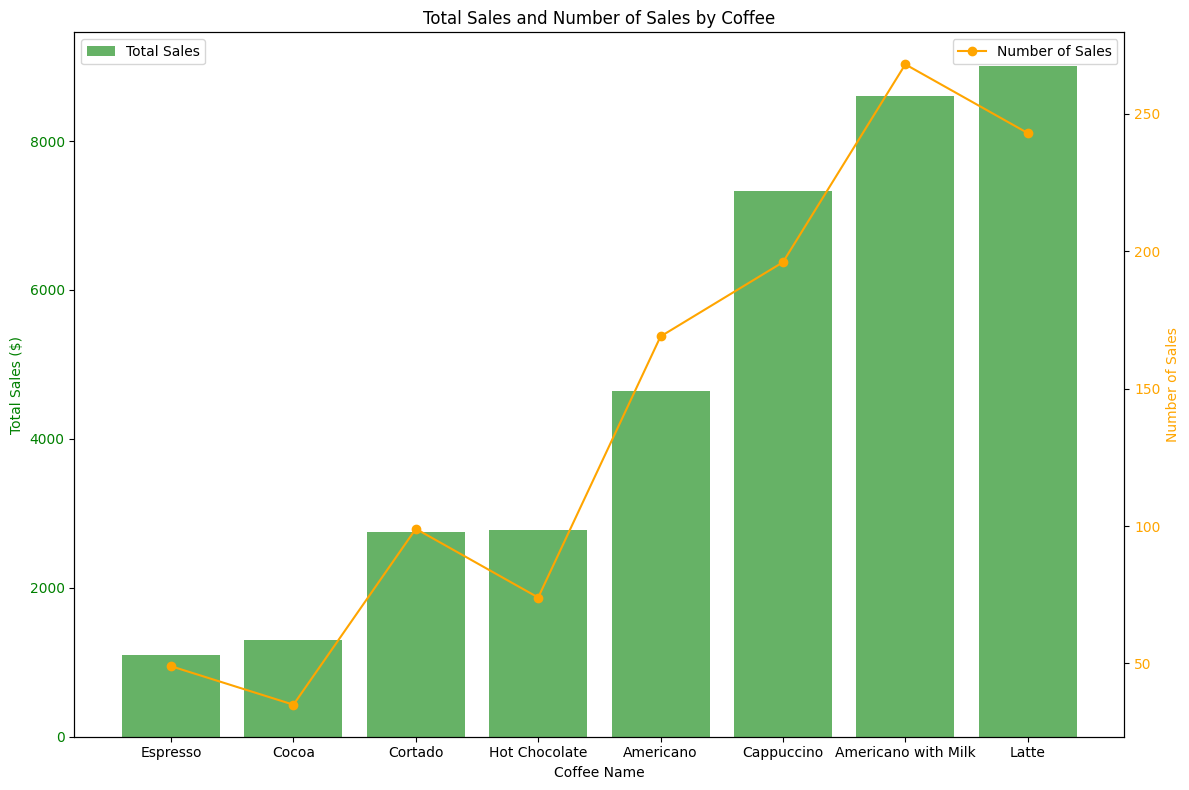

In [ ]:
#....Total sales by Coffee Name Bar Line Charts....
# Total and count sales by Coffee
coffee_names = df['coffee_name'].unique()
total_sale_by_coffee = df.groupby('coffee_name')['money'].sum()
count_sale_by_coffee = df.groupby('coffee_name')['money'].count()

sorted_total_sale = total_sale_by_coffee.sort_values()
sorted_count_sale = count_sale_by_coffee.loc[sorted_total_sale.index]

# Plot Total sales and count of sales by coffee name
fig, ax1 = plt.subplots(figsize = (12,8))

# Bar chart for total sales
color = 'green'
ax1.set_xlabel('Coffee Name')
ax1.set_ylabel('Total Sales ($)', color=color)
ax1.bar(sorted_total_sale.index, sorted_total_sale, color=color, alpha=0.6, label='Total Sales')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the number of sales
ax2 = ax1.twinx()
color = 'orange'
ax2.set_ylabel('Number of Sales', color=color)
ax2.plot(sorted_count_sale.index, sorted_count_sale, color=color, marker = 'o', label = 'Number of Sales')
ax2.tick_params(axis = 'y', labelcolor=color)

plt.title('Total Sales and Number of Sales by Coffee')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

# Total Sales and Number of Sales by Coffee Name
The graph indicates a strong preference for milk-based coffees like Cappuccino and Latte, as they generate both high sales volume and revenue. Lower total sales but higher per-transaction value might be evident in other drinks like Espresso.

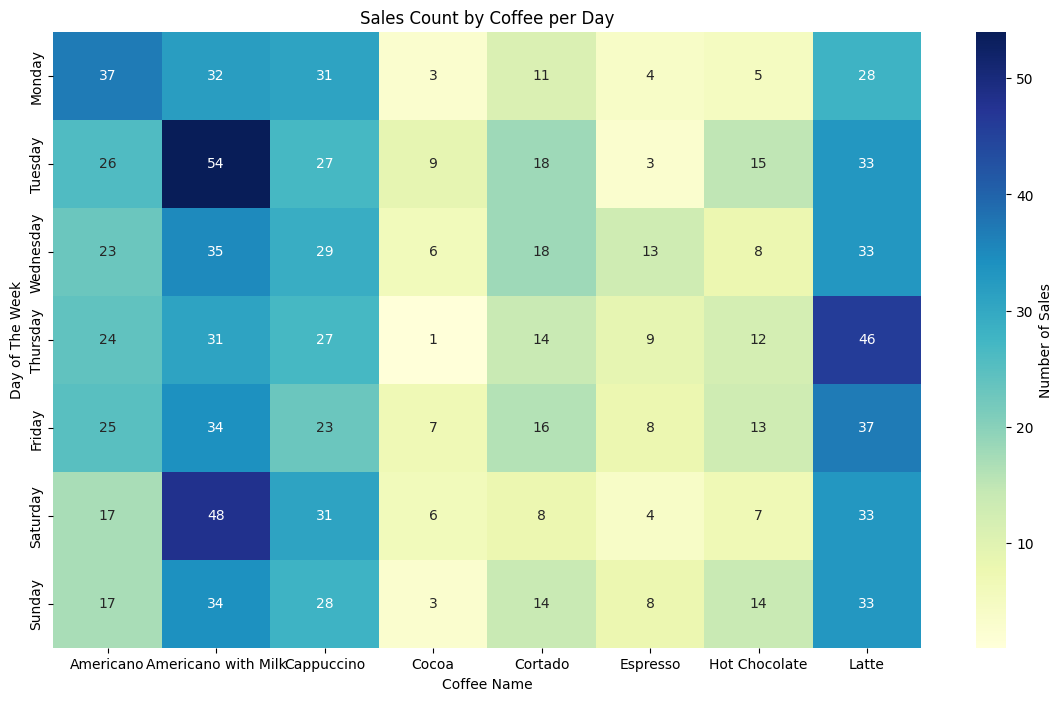

In [ ]:
# Sales by coffee per day Heatmap
# Sales by coffee type per day
sale_by_coffee_perday = df.groupby(['day_name','coffee_name'])['money'].count().unstack().fillna(0)

# Plot sales by coffee per day using a heatmap
plt.figure(figsize=(14,8))
sns.heatmap(sale_by_coffee_perday, cmap = 'YlGnBu', annot = True, fmt = '.0f', cbar_kws = {'label': 'Number of Sales'})
plt.title('Sales Count by Coffee per Day')
plt.xlabel('Coffee Name')
plt.ylabel('Day of The Week')
plt.xticks(rotation = 'horizontal')
plt.show()

# Sales Count by Coffee Name per Day

Trend:

Sales are distributed across the week with variations depending on the day.


Certain coffee types like Americano with Milk and Cappuccino have higher sales on specific days, particularly on weekends.

Pattern: There is a visible pattern where some coffee types are more popular on certain days. For example, Americano with Milk has high sales on Tuesdays and Saturdays.

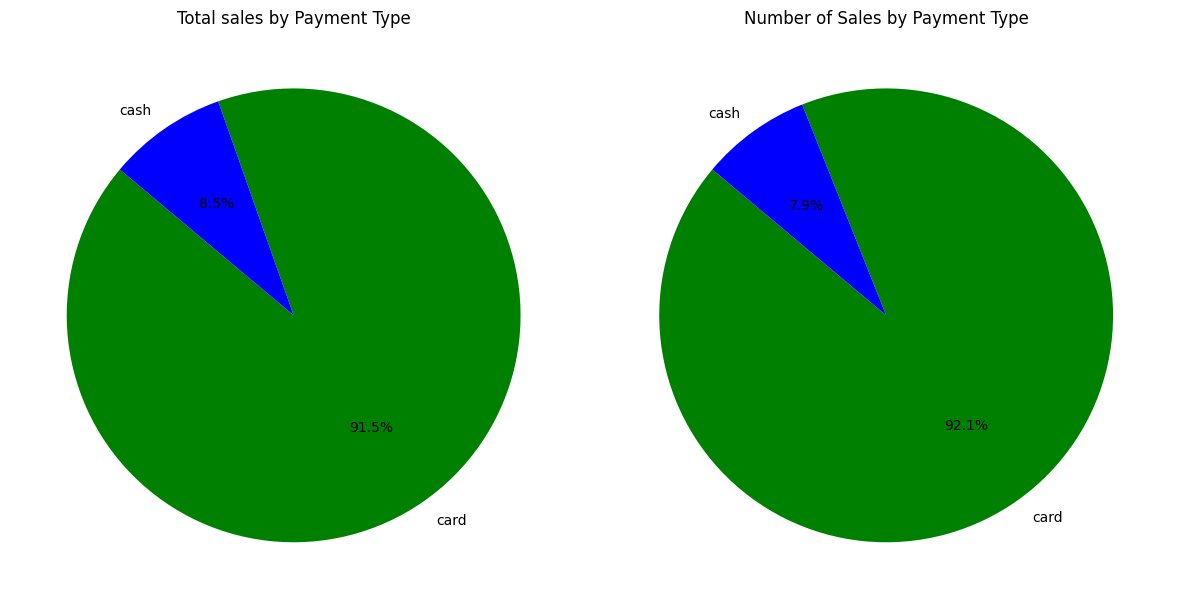

In [ ]:
#....Total sales by Payment Piecharts....
# Total and Count of Sales by payment type
payment_type = df['cash_type'].unique()
total_sale_by_payment = df.groupby('cash_type')['money'].sum()
count_sale_by_payment = df.groupby('cash_type')['money'].count()

# Plot pie chart for total sales
plt.figure(figsize =(12,6))
plt.subplot(1, 2, 1)
plt.pie(total_sale_by_payment, labels = total_sale_by_payment.index, autopct = '%1.1f%%', startangle = 140, colors = ['g','b'])
plt.title('Total sales by Payment Type')

# Plot pie chart for number of sales
plt.subplot(1, 2, 2)           # 1 row, 2 columns, 2nd subplot
plt.pie(count_sale_by_payment, labels = count_sale_by_payment.index, autopct = '%1.1f%%', startangle = 140, colors = ['g','b'])
plt.title('Number of Sales by Payment Type')

plt.tight_layout()
plt.show()

# Total Sales and Number of Sales by Payment Type
Trend:

Card Dominance: The majority of sales, both in terms of total sales (91.5%) and number of sales (92.1%), are made through card payments. Cash payments represent a small fraction of the total (8.5% and 7.9%, respectively).

Pattern: Card payments dominate both in total sales and transaction numbers.

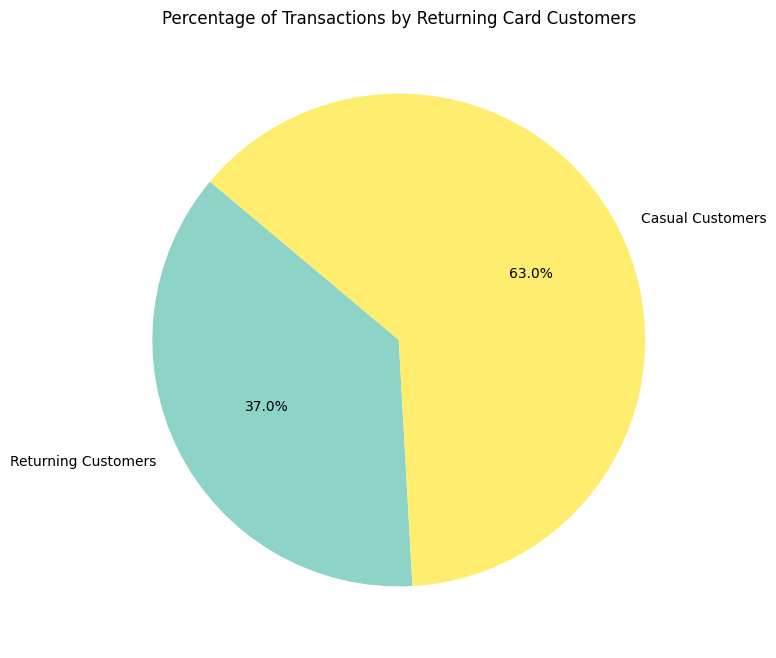

In [ ]:
#....Returning card customers percentage piechart....
# Returning card customers
returning_customers = df['card'].value_counts()
returning_customers = returning_customers[returning_customers > 1].index
returning_customers_df = df[df['card'].isin(returning_customers)]
returning_customers_count = returning_customers_df['card'].value_counts()
returning_customers_count = returning_customers_df['card'].nunique()
casual_customers_count = df['card'].nunique() - returning_customers_count

# Prepare the data for plotting
customer_counts = pd.Series([returning_customers_count, casual_customers_count], index = ['Returning Customers', 'Casual Customers'])

# Plotting returning card customers
plt.figure(figsize = (8, 8))
customer_counts.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 140, colormap = 'Set3')
plt.title('Percentage of Transactions by Returning Card Customers')
plt.show()

# Percentage of Transactions by Returning Card Customers
Trend:

Casual vs. Returning Customers: A larger proportion of transactions 63% are made by casual card customers, while returning card customers account for 37% of transactions.

Pattern: There is a significant number of returning customers, though casual customers form the majority.

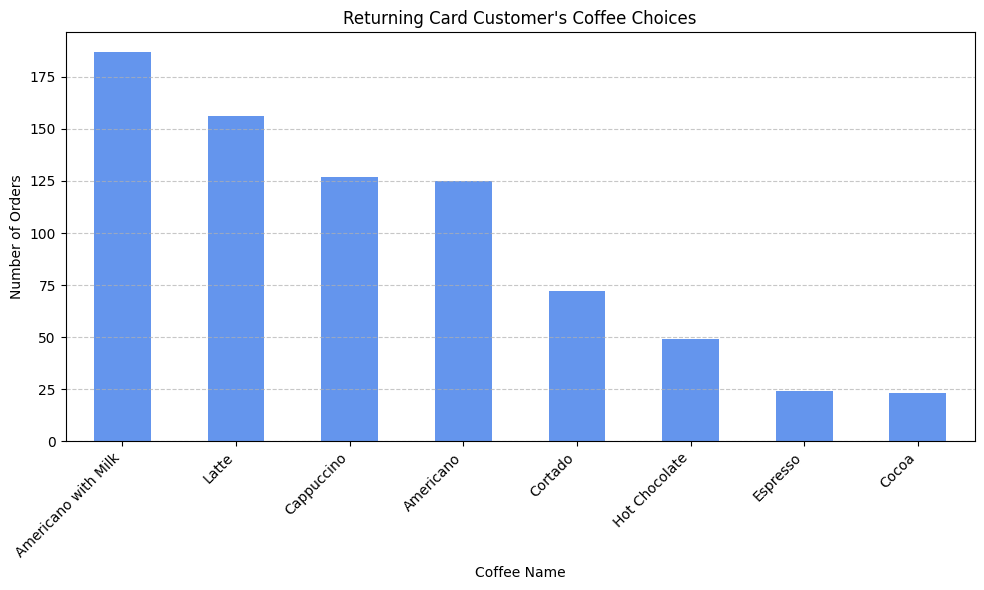

In [ ]:
#....Returning card customer's coffee choice....
# Calculate returning card customer's coffee choice
coffee_choices = returning_customers_df['coffee_name'].value_counts()

# Plotting returning card customer's coffee choice
plt.figure(figsize = (10, 6))
coffee_choices.plot(kind = 'bar', color = 'cornflowerblue')
plt.title("Returning Card Customer's Coffee Choices")
plt.xlabel('Coffee Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

# Returning Card Customer's Coffee Choices
Trend:

Popular Choices: Among returning card customers, "Americano with Milk" is the most popular coffee choice, followed by Latte, Cappuccino and Americano.

Diverse Preferences: The bar chart shows a preference for milk-based coffee drinks, with Americano with Milk and Latte leading the choices. Other options like Cappuccino, Americano, and Cortado also have a notable number of orders, but there is less interest in Hot Chocolate, Cocoa and Espresso.

Pattern: Returning customers show a strong preference for milk-based coffee drinks.

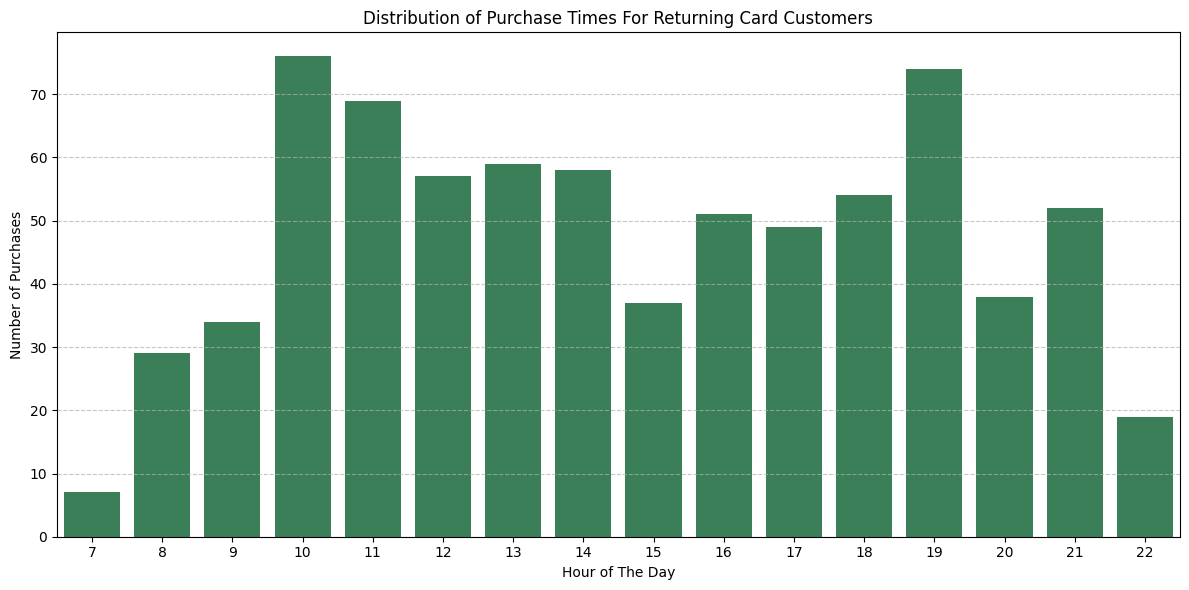

In [ ]:
#....Returning card customer hourly distribution....
# Group by hour to get the number of purchases at each hour
hourly_purchases = returning_customers_df.groupby('hour')['money'].count()

# Plotting the distribution of purchase times for returning card customers
plt.figure(figsize = (12, 6))
sns.barplot(x = hourly_purchases.index, y = hourly_purchases.values, color = 'seagreen')
plt.title('Distribution of Purchase Times For Returning Card Customers')
plt.xlabel('Hour of The Day')
plt.ylabel('Number of Purchases')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

# Distribution of Purchase Times for Returning Card Customers
Trends:

Morning Peak: The highest number of purchases occur at 10:00 AM, indicating a strong morning engagement from returning customers.
Evening Peak: Another significant peak is seen at 7:00 PM, suggesting high activity in the evening as well.

Patterns:

The activity is not evenly distributed across the day but shows two main peaks—one in the morning and one in the evening.

There is a noticeable decline in purchase activity around 2:00 PM to 3:00 PM, followed by a rise again in the evening.
Early morning (7:00 AM) and late night (10:00 PM) see the least number of purchases, indicating these are off-peak times.

# Conclusion:
Overall, the analysis highlights key areas for optimizing product offerings, marketing strategies, and operations to boost sales and enhance customer satisfaction.